In [29]:
import numpy as np
import pandas as pd

In [30]:
x = pd.read_csv('./Data/Intermediate_results/X.csv')

In [31]:
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2.058662e+09,2002.102628,2.126683,108.552703,143.0,3.712339e+07,7.1,4.819001e+07
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


In [32]:
y = x['worldwide_gross']

In [33]:
x = x.drop('worldwide_gross', axis= 1)

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.4) 

In [35]:
print(len(x))
print(len(x_train))
print(len(x_test))

4061
2436
1625


In [36]:
x.head(1)

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,760505847.0


In [37]:
from sklearn.linear_model import Lasso

model = Lasso()

In [38]:
model.fit(x_train, y_train)

Lasso()

In [39]:
predicted = model.predict(x_test)


In [40]:
predicted.shape

(1625,)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

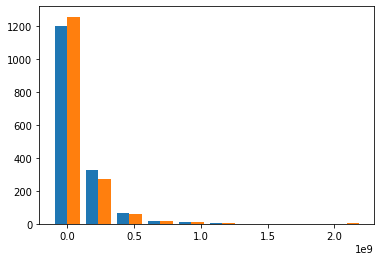

In [42]:
plt.hist([predicted, y_test]);

In [43]:
model.score(x_test, y_test)

0.8401252305771081

In [44]:
residuals = y_test - predicted

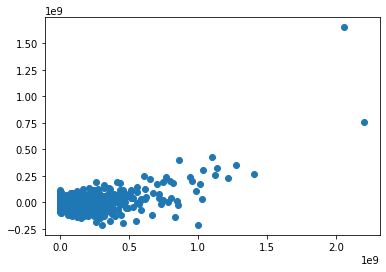

In [45]:
plt.scatter(y_test,residuals)

In [46]:
ap_residuals = np.abs(residuals) / y_test

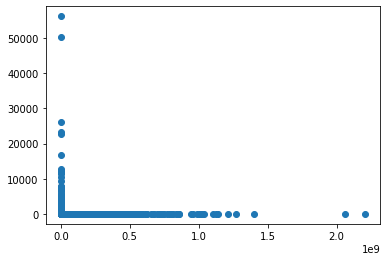

In [47]:
plt.scatter(y_test, ap_residuals)

In [48]:
lap_residuals = np.log(ap_residuals)

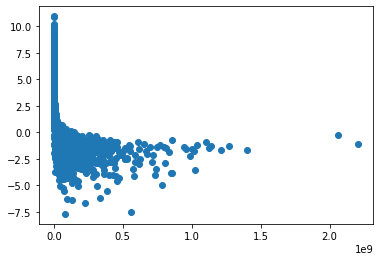

In [49]:
plt.scatter(y_test, lap_residuals)

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

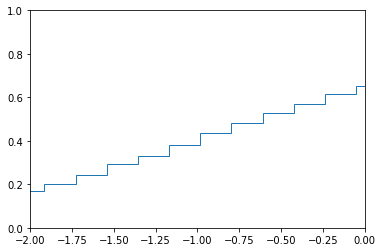

In [50]:
plt.hist(lap_residuals,bins = 100, density= 1, histtype='step', cumulative = True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

In [51]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

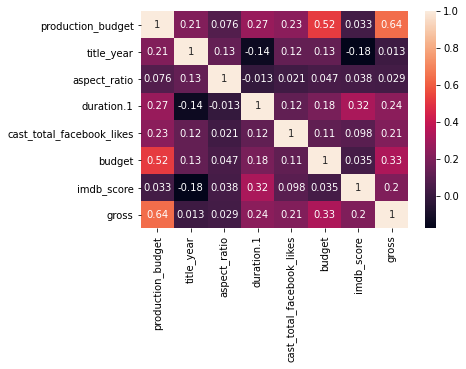

In [54]:
sns.heatmap(x.corr(), annot = True)